<br>
<br>

<center><h1>Projectile Motion Trajectories by both Analytic and Numerical methods</h1></center>
<br>
<br>
<br>

<p>Imagine we have an equation that governs the motion such as this:</p>
</br>
<p><center>$\dot{y}\left ( t \right )= f\left ( y,t \right )$</center></p>
</br>
<p>And we want to "swim" from some value $t_{s}$ to some other value $t_{f}$.</p>
<p>By using the following differential equation over the interval, we can solve this problem:</p>
</br>
<p><center>$y(t_{f}) = y(t_{s})+\int_{t_{s}}^{t_{f}}f\left ( y,t \right )dt$</center></p>

<p>Let's take the simple example of projectile motion in a constant gravity field. Here the vertical acceleration is constant, so that</p>
<p><center>$\ddot{y}=-g$</center></p>
<p>With initial conditions:</p>
<p><center>$y\left ( 0 \right )=0$</center></p>
<p><center>$\dot{y}\left ( 0 \right )=v_{0}$</center></p>
<p>The motion is pretty easy to integrate, and we know the realy answer:</p>
<p><center>$\dot{y}(t)=v_{0}-gt$</center></p>
<p><center>$y(t)=v_{0}t-\frac{1}{2}gt^{2}$</center></p>
<p>This method is called the <span style="color: red"><b>Analytic</b></span> solution</p>

<p>But let's pretend we dont' know how to integrate $\ddot{y}=-g$, and instead solve it numerically.</p>
<p>There are several <span style="color: red"><b>Numerical</b></span> methods that implemented here including:</p>
<ul>
    <li>Euler Method (2nd order accurate)</li>
    <li>Euler-Cromer Method (2nd order accurate)</li>
    <li>Runge Kutta Method (4th order accurate)</li>
</ul>
<p>Because this motion equation ($\ddot{y}=-g$) is second order in the time derivative, we need to broke it down into 2 1st order differential equations by this trick:</p>
<p>
    $\alpha \equiv \dot{y}$
</p>
<p>
    $\beta \equiv y$
</p>
<p>The equation of motion are then:</p>
<p>$\dot{\alpha }= f\left ( \beta  \right )\equiv -g$</p>
<p>$\dot{\beta }= g\left ( \alpha  \right )\equiv \alpha $</p>

In [141]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 12})

## Initial Values

In [142]:
t = t0 = 0 # s
a = g = -9.81
y0 = 0 # m
v0 = 60 # m/s

dt_analytic = 0.001
dt_rk4 = 1
dt_eulor = 0.1
dt_eulor_cromer = 0.1

# Analytic Solution

In [143]:
def analytic(dt):
    y_new = (v0 * dt) + (0.5 * a * dt ** 2)
    v_new = v0 + (a * dt)
    return [y_new, v_new]

In [144]:
y_analytic = [y0]
v_analytic = [v0]
t = 0
e = []
while y_analytic[-1] >= 0:
    res_analytic = analytic(t)
    t += dt_analytic
    y_analytic.append(res_analytic[0])
    v_analytic.append(res_analytic[1])
    e.append((0.5 * res_analytic[1] ** 2) + (a * res_analytic[0]))

# Runge Kutta 4th order

In [145]:
def RK4(y, v, dt, f):

    k1 = [dt * e for e in f(y[-1], v[-1])]
    k2 = [dt * e for e in f(y[-1]+(k1[0]/2), v[-1]+(k1[1]/2))]
    k3 = [dt * e for e in f(y[-1]+(k2[0]/2), v[-1]+(k2[1]/2))]
    k4 = [dt * e for e in f(y[-1]+k3[0], v[-1]+k3[1])]
    
    y_n = y[-1] + 1./6*(k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
    v_n = v[-1] + 1./6*(k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
    
    return [y_n, v_n]

def f(y, v):
    y_new = v
    v_new = a
    return [y_new,v_new]

In [146]:
t = 0
y_rk4 = [y0]
v_rk4 = [v0]
error_rk4 = []

while y_rk4[-1] >= 0:
    res_rk4 = RK4(y_rk4, v_rk4, dt_rk4, f)
    y_rk4.append(res_rk4[0])
    v_rk4.append(res_rk4[1])
    t += dt_rk4
    
    error_rk4.append(res_rk4[0] - analytic(t)[0])

## Euler

In [147]:
def Euler(y, v, dt):
    y_new = y + (v * dt)
    v_new = v + (a * dt)
    return [y_new, v_new]

In [148]:
t = 0
y_euler = [y0]
v_euler = [v0]
error_eulor = []

while y_euler[-1] >= 0:
    res_euler = Euler(y_euler[-1], v_euler[-1], dt_eulor)
    y_euler.append(res_euler[0])
    v_euler.append(res_euler[1])
    t += dt_eulor
    
    error_eulor.append(res_euler[0] - analytic(t)[0])

# Euler-Cromer

In [149]:
def EulerCromer(y, v, dt):
    v_new = v + (a * dt)
    y_new = y + (v_new * dt)
    return [y_new, v_new]

In [150]:
t = 0
y_euler_cromer = [y0]
v_euler_cromer = [v0]
error_eulor_cromer = []

while y_euler_cromer[-1] >= 0:
    res_euler_cromer = EulerCromer(y_euler_cromer[-1], v_euler_cromer[-1], dt_eulor_cromer)
    t += dt_eulor_cromer
    y_euler_cromer.append(res_euler_cromer[0])
    v_euler_cromer.append(res_euler_cromer[1])
    error_eulor_cromer.append(res_euler_cromer[0] - analytic(t)[0])

## Plot

In [151]:
t_rk4 = np.arange(t0, dt_rk4*len(y_rk4), dt_rk4)
t_analytic = np.arange(t0, dt_analytic*len(y_analytic), dt_analytic)
t_euler = np.arange(t0, dt_eulor*len(y_euler), dt_eulor)
t_euler_cromer = np.arange(t0, dt_eulor_cromer*len(y_euler_cromer), dt_eulor_cromer)

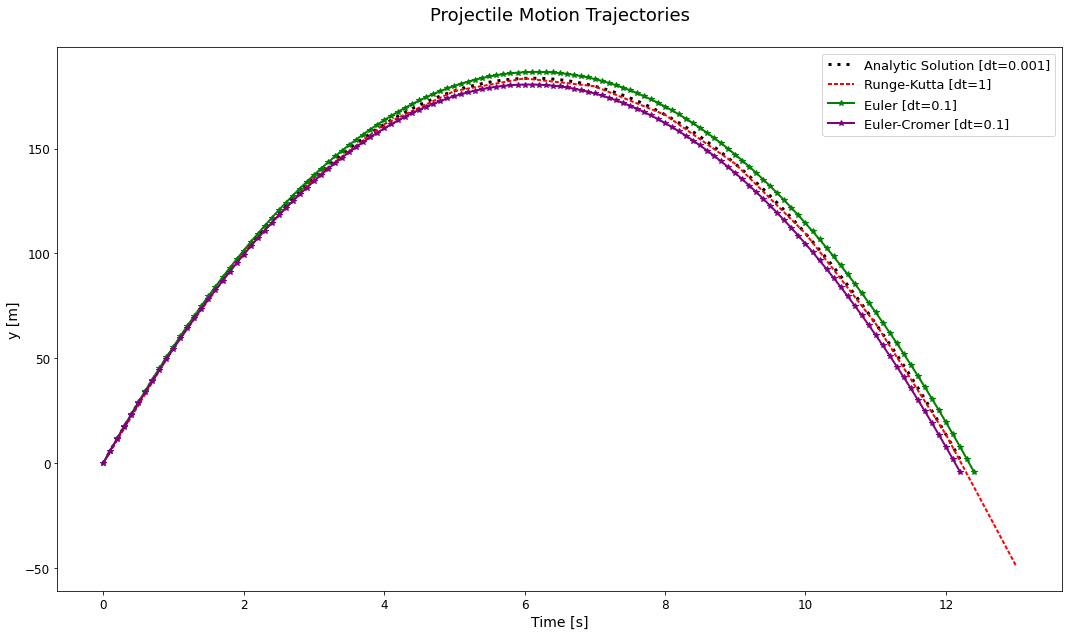

In [156]:
plt.figure(figsize=(18,10))
plt.plot(t_analytic, y_analytic, label="Analytic Solution [dt={}]".format(dt_analytic), dashes=(1,2), color="black",lw=3)
plt.plot(t_rk4, y_rk4, label="Runge-Kutta [dt={}]".format(dt_rk4), dashes=(2,1), color="red",lw=2)
plt.plot(t_euler, y_euler, label="Euler [dt={}]".format(dt_eulor), marker = '*', color="green",lw=2)
plt.plot(t_euler_cromer, y_euler_cromer, label="Euler-Cromer [dt={}]".format(dt_eulor_cromer), marker = '*', color="purple", lw=2)
plt.legend(loc="best", fontsize=13)
plt.title("Projectile Motion Trajectories\n", fontsize=18)
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("y [m]", fontsize=14)
plt.show()

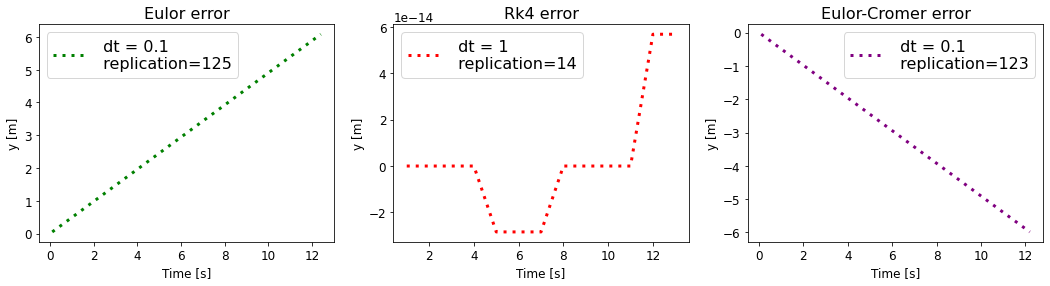

In [154]:
plt.figure(figsize=(18,4))
plt.subplot(1, 3, 1)
plt.plot(t_euler[1:], error_eulor, label=" dt = {}\n replication={}".format(dt_eulor,len(y_euler)), dashes=(1,2), color="green",lw=3)
plt.title("Eulor error", fontsize=16)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel("y [m]", fontsize=12)
plt.legend(loc="best", fontsize=16)
plt.subplot(1, 3, 2)
plt.plot(t_rk4[1:], error_rk4, label=" dt = {}\n replication={}".format(dt_rk4,len(y_rk4)), dashes=(1,2), color="red",lw=3)
plt.title("Rk4 error", fontsize=16)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel("y [m]", fontsize=12)
plt.legend(loc="best", fontsize=16)
plt.subplot(1, 3, 3)
plt.plot(t_euler_cromer[1:], error_eulor_cromer, label=" dt = {}\n replication={}".format(dt_eulor_cromer, len(y_euler_cromer)), dashes=(1,2), color="purple",lw=3)
plt.title("Eulor-Cromer error", fontsize=16)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel("y [m]", fontsize=12)
plt.legend(loc="best", fontsize=16)
plt.show()